<a href="https://colab.research.google.com/github/abdalrhmangamal12/machine-learning-/blob/main/Intrusion_classification_in_NSL_KDD_project___(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## import dataset

In [ ]:
data_train=pd.read_csv('train_COMPETITION - train_COMPETITION.csv') # training data set 
data_test=pd.read_csv('test_COMPETITION - test_COMPETITION.csv') #load testing data

In [ ]:
pf_train=data_train.copy()
pf_test=data_test.copy()

In [ ]:
pf_train.head()

,ID,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,Class
0,7060,0,tcp,smtp,SF,1129,327,0,0,0,...,1.00,0.00,0.14,0.02,0.0,0.04,0.0,0.01,21,0
1,22036,0,tcp,http,SF,242,2147,0,0,0,...,1.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,21,0
2,19555,0,tcp,http,SF,299,3991,0,0,0,...,1.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,21,0
3,11393,0,udp,domain_u,SF,43,133,0,0,0,...,1.00,0.01,0.00,0.00,0.0,0.00,0.0,0.00,21,0
4,22783,0,tcp,telnet,S0,0,0,0,0,0,...,0.14,0.19,0.05,0.00,0.1,0.67,0.0,0.00,4,0


In [ ]:
pf_test.head()

,ID,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
0,15831,0,tcp,http,REJ,0,0,0,0,0,...,236,1.00,0.00,0.09,0.01,0.0,0.0,1.0,0.07,21
1,12617,0,tcp,ftp_data,SF,151,0,0,0,0,...,37,0.33,0.07,0.33,0.05,0.0,0.0,0.0,0.00,20
2,16328,0,udp,domain_u,SF,44,139,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,21
3,11403,0,tcp,http,SF,251,4014,0,0,0,...,255,1.00,0.00,0.00,0.01,0.0,0.0,0.0,0.00,21
4,11891,0,tcp,smtp,SF,1317,367,0,0,0,...,166,0.80,0.40,0.20,0.02,0.0,0.0,0.0,0.00,21


In [ ]:
print(f'shape of training data{pf_train.shape}')
print(f'shape of test data{pf_test.shape}')

shape of training data(17251, 44)
shape of test data(5751, 43)


In [ ]:
pf_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17251 entries, 0 to 17250
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           17251 non-null  int64  
 1   duration                     17251 non-null  int64  
 2   protocol_type                17251 non-null  object 
 3   service                      17251 non-null  object 
 4   flag                         17251 non-null  object 
 5   src_bytes                    17251 non-null  int64  
 6   dst_bytes                    17251 non-null  int64  
 7   land                         17251 non-null  int64  
 8   wrong_fragment               17251 non-null  int64  
 9   urgent                       17251 non-null  int64  
 10  hot                          17251 non-null  int64  
 11  num_failed_logins            17251 non-null  int64  
 12  logged_in                    17251 non-null  int64  
 13  num_compromised 

## show null values in data 


In [ ]:

print(f'null values for training data{pf_train.isnull().sum()}' )#for training data
print(f'null values for test data{pf_test.isnull().sum()}')#for testing_data

null values for training dataID                             0
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate 

###  null values not exist in the data so data is not have missing values 

## drop id colums from dataset

In [ ]:
pf_train.drop('ID',axis=1,inplace=True)# drop id in ttraining set
pf_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,Class
0,0,tcp,smtp,SF,1129,327,0,0,0,0,...,1.00,0.00,0.14,0.02,0.0,0.04,0.0,0.01,21,0
1,0,tcp,http,SF,242,2147,0,0,0,0,...,1.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,21,0
2,0,tcp,http,SF,299,3991,0,0,0,0,...,1.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,21,0
3,0,udp,domain_u,SF,43,133,0,0,0,0,...,1.00,0.01,0.00,0.00,0.0,0.00,0.0,0.00,21,0
4,0,tcp,telnet,S0,0,0,0,0,0,0,...,0.14,0.19,0.05,0.00,0.1,0.67,0.0,0.00,4,0


In [ ]:
pf_test.drop('ID',axis=1,inplace=True) #drop id in test set
pf_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
0,0,tcp,http,REJ,0,0,0,0,0,0,...,236,1.00,0.00,0.09,0.01,0.0,0.0,1.0,0.07,21
1,0,tcp,ftp_data,SF,151,0,0,0,0,0,...,37,0.33,0.07,0.33,0.05,0.0,0.0,0.0,0.00,20
2,0,udp,domain_u,SF,44,139,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,21
3,0,tcp,http,SF,251,4014,0,0,0,0,...,255,1.00,0.00,0.00,0.01,0.0,0.0,0.0,0.00,21
4,0,tcp,smtp,SF,1317,367,0,0,0,0,...,166,0.80,0.40,0.20,0.02,0.0,0.0,0.0,0.00,21


## determine categorical  feature in data 

In [ ]:
#for training set
cat_train =[var for var in pf_train.columns if pf_train[var].dtype=='object']  
print(f'catigorical data in training set {cat_train} ')
#for test set
cat_test =[var for var in pf_test.columns if pf_test[var].dtype=='object']  
print(f'catigorical data in test set {cat_test} ')


catigorical data in training set ['protocol_type', 'service', 'flag'] 
catigorical data in test set ['protocol_type', 'service', 'flag'] 


## 'protocol_type', 'service', 'flag' are the categorical feature in data now we will see this features values 

In [ ]:
# for protocol_type in training set 
print (f'the categorical values in training feature protocol_type is { pf_train.protocol_type.unique() } and has numbers {pf_train.protocol_type.value_counts()}')
#for protocol_type in test set 
print (f'the categorical values in protocol_type is { pf_test.protocol_type.unique() } and has numbers {pf_test.protocol_type.value_counts()}')

the categorical values in training feature protocol_type is ['tcp' 'udp' 'icmp'] and has numbers tcp     14070
udp      2011
icmp     1170
Name: protocol_type, dtype: int64
the categorical values in protocol_type is ['tcp' 'udp' 'icmp'] and has numbers tcp     4670
udp      714
icmp     367
Name: protocol_type, dtype: int64


In [ ]:
# service in training set
print (f'the categorical values in training feature service is { pf_train.service.unique() } and has numbers {pf_train.service.value_counts()}')
print (f'the categorical values numbers  in training feature  service {pf_train.service.nunique()} labels')
# service in test set
print (f'the categorical values in test feature service is { pf_test.service.unique() } and has numbers {pf_test.service.value_counts()}')
print (f'the categorical values numbers in test feature  service {pf_test.service.nunique()} labels')

the categorical values in training feature service is ['smtp' 'http' 'domain_u' 'telnet' 'supdup' 'private' 'ftp_data' 'uucp'
 'eco_i' 'mtp' 'ctf' 'bgp' 'ecr_i' 'ldap' 'ftp' 'daytime' 'hostnames'
 'auth' 'name' 'efs' 'other' 'urp_i' 'netbios_ns' 'iso_tsap' 'finger'
 'vmnet' 'systat' 'red_i' 'uucp_path' 'exec' 'netbios_ssn' 'time' 'klogin'
 'Z39_50' 'domain' 'login' 'imap4' 'courier' 'http_443' 'sunrpc' 'whois'
 'link' 'pop_3' 'csnet_ns' 'netbios_dgm' 'gopher' 'sql_net' 'netstat'
 'echo' 'nnsp' 'kshell' 'discard' 'ssh' 'IRC' 'ntp_u' 'X11' 'pop_2' 'nntp'
 'pm_dump' 'printer' 'shell' 'rje' 'urh_i' 'remote_job' 'http_8001'
 'tim_i'] and has numbers http         5376
private      3074
domain_u     1202
smtp          984
ftp_data      958
             ... 
pm_dump         3
urh_i           3
red_i           2
http_8001       1
tim_i           1
Name: service, Length: 66, dtype: int64
the categorical values numbers  in training feature  service 66 labels
the categorical values in test feature

In [ ]:
#flag for training set 
print (f'the categorical values in training feature service is { pf_train.flag.unique() } and has numbers {pf_train.flag.value_counts()}')
print (f'the categorical values numbers  in train featurew service {pf_train.flag.nunique()} labels')
#flag for test set 
print (f'the categorical values in training feature service is { pf_test.flag.unique() } and has numbers {pf_test.flag.value_counts()}')
print (f'the categorical values numbers  in train featurew service {pf_test.flag.nunique()} labels')

the categorical values in training feature service is ['SF' 'S0' 'REJ' 'RSTR' 'RSTO' 'S2' 'S1' 'RSTOS0' 'SH' 'OTH' 'S3'] and has numbers SF        10114
S0         4943
REJ        1512
RSTR        333
RSTO        208
S1           60
SH           37
RSTOS0       18
S2           15
S3            9
OTH           2
Name: flag, dtype: int64
the categorical values numbers  in train featurew service 11 labels
the categorical values in training feature service is ['REJ' 'SF' 'S0' 'RSTR' 'RSTO' 'S3' 'SH' 'S1' 'S2' 'RSTOS0' 'OTH'] and has numbers SF        3357
S0        1623
REJ        530
RSTR       129
RSTO        74
S1          21
SH           5
S3           4
S2           4
RSTOS0       2
OTH          2
Name: flag, dtype: int64
the categorical values numbers  in train featurew service 11 labels


# data preprocessing

## do hot encoding for training and test catigorical data  

In [ ]:
cat_train_data=pf_train[['protocol_type','service','flag']] # split catigorical data from training data 
cat_train_data.head()


,protocol_type,service,flag
0,tcp,smtp,SF
1,tcp,http,SF
2,tcp,http,SF
3,udp,domain_u,SF
4,tcp,telnet,S0


In [ ]:
pf_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,Class
0,0,tcp,smtp,SF,1129,327,0,0,0,0,...,1.00,0.00,0.14,0.02,0.0,0.04,0.0,0.01,21,0
1,0,tcp,http,SF,242,2147,0,0,0,0,...,1.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,21,0
2,0,tcp,http,SF,299,3991,0,0,0,0,...,1.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,21,0
3,0,udp,domain_u,SF,43,133,0,0,0,0,...,1.00,0.01,0.00,0.00,0.0,0.00,0.0,0.00,21,0
4,0,tcp,telnet,S0,0,0,0,0,0,0,...,0.14,0.19,0.05,0.00,0.1,0.67,0.0,0.00,4,0


In [ ]:
numirical_train=pf_train.drop(['protocol_type','service','flag'],axis=1) #get numerical features

In [ ]:
numirical_train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,Class
0,0,1129,327,0,0,0,0,0,1,0,...,1.00,0.00,0.14,0.02,0.0,0.04,0.0,0.01,21,0
1,0,242,2147,0,0,0,0,0,1,0,...,1.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,21,0
2,0,299,3991,0,0,0,0,0,1,0,...,1.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,21,0
3,0,43,133,0,0,0,0,0,0,0,...,1.00,0.01,0.00,0.00,0.0,0.00,0.0,0.00,21,0
4,0,0,0,0,0,0,0,0,0,0,...,0.14,0.19,0.05,0.00,0.1,0.67,0.0,0.00,4,0


In [ ]:
pf_train=pd.get_dummies(pf_train,columns=['protocol_type','service','flag'],drop_first=True)
pf_train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,1129,327,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,242,2147,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,299,3991,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,43,133,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### showing the encoding data 

In [ ]:
num_culoms=numirical_train.columns
print(num_culoms)
encoding_traindata =pf_train.drop(num_culoms,axis=1)
encoding_traindata.head()

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'level', 'Class'],
      dtype='object')


,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### from three feature after hot encoding we have 77 features for traing data

## hot encoding for catigorical features in test set

In [ ]:
numirical_test=pf_test.drop(['protocol_type','service','flag'],axis=1) #get numerical features
numirical_test.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
0,0,0,0,0,0,0,0,0,0,0,...,236,1.00,0.00,0.09,0.01,0.0,0.0,1.0,0.07,21
1,0,151,0,0,0,0,0,0,0,0,...,37,0.33,0.07,0.33,0.05,0.0,0.0,0.0,0.00,20
2,0,44,139,0,0,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,21
3,0,251,4014,0,0,0,0,0,1,0,...,255,1.00,0.00,0.00,0.01,0.0,0.0,0.0,0.00,21
4,0,1317,367,0,0,0,0,0,1,0,...,166,0.80,0.40,0.20,0.02,0.0,0.0,0.0,0.00,21


In [ ]:
pf_test=pd.get_dummies(pf_test,columns=['protocol_type','service','flag'],drop_first=True)
pf_test.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,151,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,44,139,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,251,4014,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1317,367,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
num_culomtest=numirical_test.columns
print(num_culoms)
encoding_testdata =pf_test.drop(num_culomtest,axis=1)
encoding_testdata.head()

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'level', 'Class'],
      dtype='object')


,protocol_type_tcp,protocol_type_udp,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## now number of features in training set is 117 and in test set is 113 so i will add
## the mising fetures in the test set from the training set 

In [ ]:
x=list(encoding_traindata.columns)
y=(encoding_testdata.columns)
diff=list(set(x)-set(y))# get differance colums betweem traing set and test set
print(diff)

['service_tim_i', 'service_http_8001', 'service_pm_dump']


In [ ]:
for c in diff:
    pf_test[c] = 0 #we add thre colums and values is zeros
pf=pf_train.drop('Class',axis=1)    
print(f'shape of training data is {pf.shape}')    
print(f'shape of test data is {pf_test.shape}')

shape of training data is (17251, 116)
shape of test data is (5751, 116)


In [ ]:
pf_test.service_http_8001.unique()

array([0], dtype=int64)

#####  now shape of training data is the same for the test data

## show target label in training data set

In [ ]:
pf_train['Class'].head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [ ]:
pf_train['Class'].value_counts()

0    9000
1    8251
Name: Class, dtype: int64

#### target has two lables 1 or zero so this is a baniary classifaction problem and data has 9000 zero and 8251 is one so data is balanced

In [ ]:
numirical_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,Class
count,17251.000000,1.725100e+04,1.725100e+04,17251.000000,17251.000000,17251.0,17251.000000,17251.000000,17251.000000,17251.000000,...,17251.000000,17251.000000,17251.000000,17251.000000,17251.000000,17251.000000,17251.000000,17251.000000,17251.000000,17251.000000
mean,300.978958,3.107782e+04,3.531403e+03,0.000116,0.025274,0.0,0.184627,0.001101,0.388151,0.292041,...,0.513184,0.083868,0.147851,0.031412,0.294951,0.289118,0.116886,0.118235,19.474291,0.478291
std,2646.007952,2.910731e+06,9.012346e+04,0.010767,0.268866,0.0,2.081791,0.043724,0.487343,12.386128,...,0.449423,0.189233,0.309810,0.109439,0.449514,0.450570,0.304704,0.316774,2.327471,0.499543
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.470000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
75%,0.000000,2.770000e+02,4.920000e+02,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.070000,0.060000,0.010000,1.000000,1.000000,0.000000,0.000000,21.000000,1.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,0.0,77.000000,4.000000,1.000000,884.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,1.000000


In [ ]:
numirical_train.nunique()

duration                        539
src_bytes                      1338
dst_bytes                      3051
land                              2
wrong_fragment                    3
urgent                            1
hot                              18
num_failed_logins                 4
logged_in                         2
num_compromised                  22
root_shell                        2
su_attempted                      3
num_root                         22
num_file_creations               16
num_shells                        2
num_access_files                  7
num_outbound_cmds                 1
is_host_login                     1
is_guest_login                    2
count                           442
srv_count                       382
serror_rate                      67
srv_serror_rate                  49
rerror_rate                      70
srv_rerror_rate                  38
same_srv_rate                    93
diff_srv_rate                    75
srv_diff_host_rate          

## split training data to training and validation

In [ ]:

from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(pf_train.drop('Class',axis=1),pf_train.Class,random_state=42,test_size=0.2)

In [ ]:
print (f'shape of x_train {x_train.shape}')
print (f'shape of x_validation {x_val.shape}')

shape of x_train (13800, 116)
shape of x_validation (3451, 116)


In [ ]:
print (f'shape of y_train {y_train.shape}')
print (f'shape of y_validation {y_val.shape}')

shape of y_train (13800,)
shape of y_validation (3451,)


In [ ]:
#reshape target in train and validation data 
y_train=y_train.values.reshape(-1,1)
y_val=y_val.values.reshape(-1,1)

In [ ]:
x_train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
1615,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9457,0,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8337,0,45,83,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8499,0,288,1745,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
x_num=list(num_culoms)
x_num=x_num[:-1]
print(f'numerical feature is {x_num} and there number is {len(x_num)}')
x_numerical=x_train[x_num]


numerical feature is ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'level'] and there number is 39


In [ ]:
x_numerical.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,13800.000000,1.380000e+04,1.380000e+04,13800.000000,13800.000000,13800.0,13800.000000,13800.000000,13800.000000,13800.000000,...,13800.000000,13800.000000,13800.000000,13800.000000,13800.000000,13800.000000,13800.000000,13800.000000,13800.000000,13800.000000
mean,294.023043,3.670086e+04,3.125844e+03,0.000072,0.028043,0.0,0.173768,0.001087,0.389565,0.307174,...,113.352319,0.512140,0.084361,0.146882,0.030616,0.293767,0.287397,0.117846,0.118966,19.483478
std,2596.772244,3.253289e+06,7.881797e+04,0.008513,0.283384,0.0,1.949974,0.045830,0.487669,12.942169,...,110.415142,0.449097,0.189515,0.307960,0.106879,0.449008,0.449743,0.305660,0.317605,2.309206
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,58.000000,0.460000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.790000e+02,4.950000e+02,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.010000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,0.0,30.000000,4.000000,1.000000,884.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


## scaling

#### The next transformation I want to do is to standardize the features. This isn't required for Random Forests, but it is helpful for more complex algorithms like Support Vector Machines (plus it doesn't hurt Random Forests, so I may as well do it now).

In [ ]:

from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_train_scaled=st.fit_transform(x_train)
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns) #scale training data 
x_val_scaled=st.transform(x_val) #for validation sample we do transformation only
x_val_scaled=pd.DataFrame(x_val_scaled,columns=x_val.columns) 
pf_test_scaled=st.transform(pf_test)#for test sample we do transformation only
pf_test_scaled=pd.DataFrame(pf_test_scaled,columns=pf_test.columns)
x_train_scaled.head()


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,-0.11323,-0.011282,-0.039660,-0.008513,-0.098963,0.0,-0.089116,-0.023718,-0.798860,-0.023735,...,-0.310153,-0.112344,-0.03407,-0.141531,1.581941,-0.052547,-0.030707,-0.017028,-1.192970,-0.04509
1,-0.11323,-0.011279,-0.039660,-0.008513,-0.098963,0.0,-0.089116,-0.023718,-0.798860,-0.023735,...,-0.310153,-0.112344,-0.03407,-0.141531,-0.632135,-0.052547,-0.030707,-0.017028,0.838244,-0.04509
2,-0.11323,-0.011282,-0.039660,-0.008513,-0.098963,0.0,-0.089116,-0.023718,-0.798860,-0.023735,...,-0.310153,-0.112344,-0.03407,-0.141531,1.581941,-0.052547,-0.030707,-0.017028,-1.192970,-0.04509
3,-0.11323,-0.011268,-0.038607,-0.008513,-0.098963,0.0,-0.089116,-0.023718,-0.798860,-0.023735,...,-0.310153,-0.112344,-0.03407,-0.141531,-0.632135,-0.052547,-0.030707,-0.017028,0.838244,-0.04509
4,-0.11323,-0.011193,-0.017520,-0.008513,-0.098963,0.0,-0.089116,-0.023718,1.251784,-0.023735,...,-0.310153,-0.112344,-0.03407,-0.141531,-0.632135,-0.052547,-0.030707,-0.017028,0.838244,-0.04509


In [ ]:
x_train_scaled.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
count,1.380000e+04,1.380000e+04,1.380000e+04,1.380000e+04,1.380000e+04,13800.0,1.380000e+04,1.380000e+04,1.380000e+04,1.380000e+04,...,1.380000e+04,1.380000e+04,1.380000e+04,1.380000e+04,1.380000e+04,1.380000e+04,1.380000e+04,1.380000e+04,1.380000e+04,1.380000e+04
mean,-2.870268e-16,-1.191426e-16,9.819842e-17,-7.621068e-16,-1.543508e-15,0.0,-3.513232e-16,9.413223e-16,2.373946e-16,-4.850925e-16,...,-1.500957e-15,6.141866e-16,1.020430e-16,1.064845e-15,6.611298e-16,-5.593684e-16,-8.938693e-16,-1.669868e-15,-4.856984e-16,-5.480318e-17
std,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,0.0,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,...,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00
min,-1.132305e-01,-1.128156e-02,-3.966046e-02,-8.512874e-03,-9.896297e-02,0.0,-8.911627e-02,-2.371782e-02,-7.988596e-01,-2.373521e-02,...,-3.101533e-01,-1.123436e-01,-3.407002e-02,-1.415311e-01,-6.321347e-01,-5.254737e-02,-3.070696e-02,-1.702760e-02,-1.192970e+00,-4.509003e-02
25%,-1.132305e-01,-1.128156e-02,-3.966046e-02,-8.512874e-03,-9.896297e-02,0.0,-8.911627e-02,-2.371782e-02,-7.988596e-01,-2.373521e-02,...,-3.101533e-01,-1.123436e-01,-3.407002e-02,-1.415311e-01,-6.321347e-01,-5.254737e-02,-3.070696e-02,-1.702760e-02,-1.192970e+00,-4.509003e-02
50%,-1.132305e-01,-1.126804e-02,-3.966046e-02,-8.512874e-03,-9.896297e-02,0.0,-8.911627e-02,-2.371782e-02,-7.988596e-01,-2.373521e-02,...,-3.101533e-01,-1.123436e-01,-3.407002e-02,-1.415311e-01,-6.321347e-01,-5.254737e-02,-3.070696e-02,-1.702760e-02,8.382438e-01,-4.509003e-02
75%,-1.132305e-01,-1.119580e-02,-3.337994e-02,-8.512874e-03,-9.896297e-02,0.0,-8.911627e-02,-2.371782e-02,1.251784e+00,-2.373521e-02,...,-3.101533e-01,-1.123436e-01,-3.407002e-02,-1.415311e-01,1.581941e+00,-5.254737e-02,-3.070696e-02,-1.702760e-02,8.382438e-01,-4.509003e-02
max,1.639324e+01,1.173232e+02,6.532071e+01,1.174691e+02,1.048777e+01,0.0,1.529626e+01,8.725787e+01,1.251784e+00,6.828259e+01,...,3.224212e+00,8.901267e+00,2.935132e+01,7.065586e+00,1.581941e+00,1.903045e+01,3.256591e+01,5.872819e+01,8.382438e-01,2.217785e+01


The features have now been standardized so that they all have a mean of 0 and a standard deviation of 1.


# PCA

Principal Components Analysis takes the features we have and tries to combine them in ways that maximize the amount of variance the components can explain in the data. For datasets like the one I'm working with here, where there are lots of features, PCA can help us avoid the negative effects of having numerous features while still allowing us to account for as much variance as possible. For my analysis below, I aim to find a number of components that will explain at least 80% of the variance in the data.

First, let's see how much variance we can explain with a wide range of components. If any of these look promising, we can drill down further.

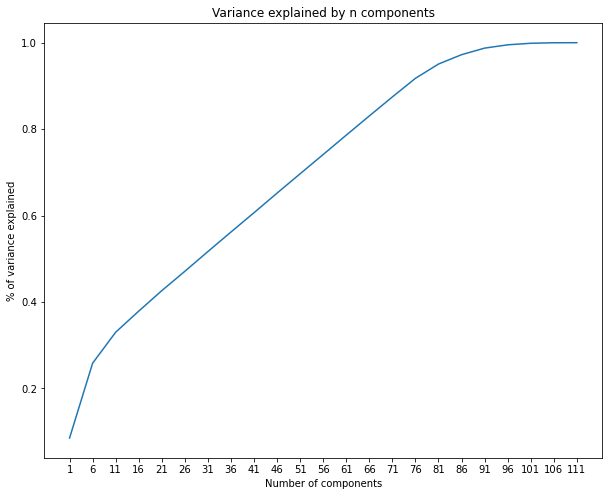

In [ ]:
# Try several numbers of components to explain 90% of variance
from sklearn.decomposition import PCA
sum_v=[]
nofcom=np.arange(1,116,5)
for i in nofcom:
    pca=PCA(n_components=i) 
    pca.fit_transform(x_train_scaled)
    sum_v.append(sum(pca.explained_variance_ratio_))
# Visualize results
plt.figure(figsize=(10,8))
plt.plot(nofcom, sum_v)
plt.xlabel('Number of components')
plt.ylabel('% of variance explained')
plt.title('Variance explained by n components')
plt.xticks(nofcom)
plt.show();  


76 components seem to capture about 90% of the variance in the data, which aligns with what we expected based on the feature importances plot above.

Let's check the specifics

In [ ]:
# View the % variance explained for each number of components
display(list(zip(nofcom,sum_v)))

[(1, 0.08537141690174749),
 (6, 0.25853404013467507),
 (11, 0.33018396789355714),
 (16, 0.3790048845640194),
 (21, 0.42632258086907),
 (26, 0.47112332950571395),
 (31, 0.5168261151658614),
 (36, 0.561960643531997),
 (41, 0.6066767806486417),
 (46, 0.652033052109057),
 (51, 0.696772593176077),
 (56, 0.7413135350158397),
 (61, 0.7861306315692637),
 (66, 0.830542286474116),
 (71, 0.8745274387307449),
 (76, 0.9175595813439436),
 (81, 0.9505796351381722),
 (86, 0.9722419526664446),
 (91, 0.9874282956711883),
 (96, 0.9950450962583446),
 (101, 0.9986712009620538),
 (106, 0.9997972647879393),
 (111, 0.9999978074154802)]

From the plot and the list above, it's clear that we could explain over 90% of the variance in the data with 76 components (out of a possible 54). Using fewer features/components will help us avoid overfitting on the training data, but at the expense of a little bit of accuracy. I think it's a worthwhile trade

I know that I want to transform my data so that it is standardized and has 76 components. I will use a pipeline to do this so that I can easily transform my validation and test sets in the same way as my training set without leaking data from one set to another.

In [ ]:
from sklearn.pipeline import Pipeline
# Build a pipeline for the preprocessing steps
pipe= Pipeline([('scaler', StandardScaler()),
                        ('pca', PCA(n_components=76))])
x_train_tran=pipe.fit_transform(x_train)
x_val_tran=pipe.transform(x_val)
x_test_tran=pipe.transform(pf_test)


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


## Testing various algorithms
In the sections that follow I will explore three different algorithms to find one that can classify land tracts by their type of tree cover with the highest accuracy.

Random Forest classifiers use a number of Decision Trees to predict labels for observations.

XGBoost is an ensemble method that trains a series of weak learners to work in sequence to predict labels. This is typically considered a more flexible and powerful type of algorithm than a Random Forest.

Support Vector Machines predict labels by drawing decision boundaries between data points in multi-dimensional space. This is considered a very powerful type of classifier, so I'm looking forward to seeing how it performs.

Random Forest 1
To establish a baseline for all the other models, the first model will be a Random Forest trained on observations that have been class-balanced but not scaled or transformed with PCA.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                             classification_report, roc_curve, auc)

forest1=RandomForestClassifier()
forest1.fit(x_train,y_train)
train_pred=forest1.predict(x_train)
print(classification_report(train_pred,y_train))

C:\Users\User\AppData\Local\Temp\ipykernel_7476\2949093215.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest1.fit(x_train,y_train)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7192
           1       1.00      1.00      1.00      6608

    accuracy                           1.00     13800
   macro avg       1.00      1.00      1.00     13800
weighted avg       1.00      1.00      1.00     13800



In [ ]:
val_predictions= forest1.predict(x_val)
print(classification_report(val_predictions,y_val))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1803
           1       1.00      0.99      1.00      1648

    accuracy                           1.00      3451
   macro avg       1.00      1.00      1.00      3451
weighted avg       1.00      1.00      1.00      3451



In [ ]:
forest1.n_estimators

100

I'm honestly surprised the model performed this well on the validation data, but it looks like this Random Forest is actually very good at predicting labels for the raw observations.

## Tune parameters with GridSearchCV

In [ ]:
# Use GridSearchCV to find best parameters for the Random Forest
from sklearn.model_selection import GridSearchCV
params = {'n_estimators': [10,30,40,60,80, 100],
          'max_features': [50, 70, 80],
          'max_depth': [20, 25]}

grid_forest1 = GridSearchCV(forest1, params, cv=3, n_jobs=-1)

grid_forest1.fit(x_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 25], 'max_features': [50, 70, 80],
                         'n_estimators': [10, 30, 40, 60, 80, 100]})

In [ ]:
grid_forest1.best_score_

0.9985507246376811

determine best parameters

In [ ]:
grid_forest1.best_params_

{'max_depth': 25, 'max_features': 50, 'n_estimators': 80}

In [ ]:
forest1=RandomForestClassifier(max_depth=20, max_features=50, n_estimators= 60)
forest1.fit(x_train,y_train)
train_pred=forest1.predict(x_train)
print(classification_report(train_pred,y_train))


C:\Users\User\AppData\Local\Temp\ipykernel_7476\2359669445.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest1.fit(x_train,y_train)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7192
           1       1.00      1.00      1.00      6608

    accuracy                           1.00     13800
   macro avg       1.00      1.00      1.00     13800
weighted avg       1.00      1.00      1.00     13800



### make cross validation 

In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(forest1,pf_train.drop('Class',axis=1),pf_train.Class,cv=5,scoring='f1_macro')
print(scores)


[0.99796806 0.997677   0.99912877 0.99825766 0.99825758]


as we see no difference in cross validation use the f1_macro same the same so i do not yse it 

In [ ]:
val_predictions= forest1.predict(x_val)
print(classification_report(val_predictions,y_val))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1800
           1       1.00      0.99      1.00      1651

    accuracy                           1.00      3451
   macro avg       1.00      1.00      1.00      3451
weighted avg       1.00      1.00      1.00      3451



f1_score for this model in validation  is 100% for two labels

# drawing learning curve for random forest

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
 train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(max_depth=20, max_features=50, n_estimators= 60), x_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

In [ ]:
#Now we have calculated the mean and standard deviation of the train and test scores.

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

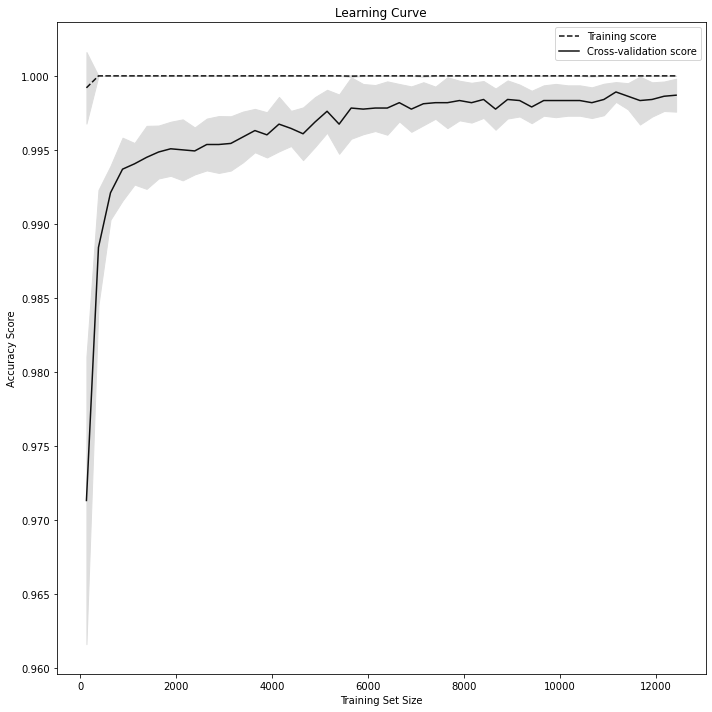

In [ ]:
# Finally, its time to plot the learning curve. We have used matplotlib to plot lines and band of the learning curve.

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

### plot feature importance 

<AxesSubplot:>

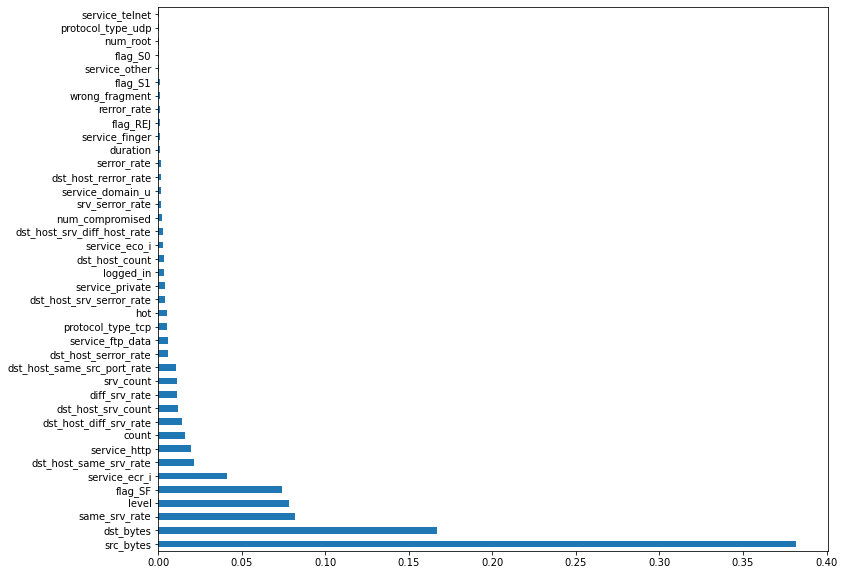

In [ ]:
plt.figure(figsize=(12,10))

feat_importances = pd.Series(forest1.feature_importances_, index=x_train.columns)
feat_importances.nlargest(40).plot(kind='barh')

The plot above shows that there are a few features that are a bit more powerful than the rest.

## XGBoost
XGBoost is an ensemble method that employs boosting, a technique where a series of weak learners is trained so that each tries to improve upon the performance of the one before it. Ensemble methods are known to be very powerful for classification tasks, so I'm eager to see how this one performs.

In [ ]:
!pip install xgboost

For this first model, I'll be using XGBClassifier() with default parameters and training on data that has been class-balanced, scaled, and transformed with PCA.

In [ ]:
import xgboost as xg
xg = xg.XGBClassifier()
# Fit the classifier to the training data
xg.fit(x_train_tran,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
# View f1_score  for validation dat

z=xg.predict(x_val_tran)
print(classification_report(z,y_val))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1797
           1       0.99      0.99      0.99      1654

    accuracy                           0.99      3451
   macro avg       0.99      0.99      0.99      3451
weighted avg       0.99      0.99      0.99      3451



f1_score for xgboost is 99

# Support Vector Machine
Support Vector Machines perform classification by finding hyperplanes to divide classes of data points in multidimensional space. Let's see how such a classifier works on this dataset.

In [ ]:

#use scaled and transform with pca 
from sklearn.svm import SVC
svc=SVC(gamma='auto')
svc.fit(x_train_tran,y_train)
s=svc.predict(x_val_tran)
print(classification_report(s,y_val))

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1791
           1       0.99      0.98      0.99      1660

    accuracy                           0.99      3451
   macro avg       0.99      0.99      0.99      3451
weighted avg       0.99      0.99      0.99      3451



# tune  parameters with GridSearchCV for svm

In [ ]:
# Use GridSearchCV to try various hyperparameter values

import warnings
warnings.filterwarnings('ignore')
params = {'gamma': [0.1, 1.0, 100.0],
          'C': [0.1, 1.0, 10.0]}

grid_svc = GridSearchCV(svc, params, cv=3, scoring='accuracy')
grid_svc.fit(x_val_tran, y_val)

GridSearchCV(cv=3, estimator=SVC(gamma='auto'),
             param_grid={'C': [0.1, 1.0, 10.0], 'gamma': [0.1, 1.0, 100.0]},
             scoring='accuracy')

In [ ]:
grid_svc.best_params_

{'C': 10.0, 'gamma': 0.1}

In [ ]:
svc=SVC(gamma=0.1,C=10)
svc.fit(x_train_tran,y_train)
s=svc.predict(x_val_tran)
print(classification_report(s,y_val))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1786
           1       1.00      0.98      0.99      1665

    accuracy                           0.99      3451
   macro avg       0.99      0.99      0.99      3451
weighted avg       0.99      0.99      0.99      3451



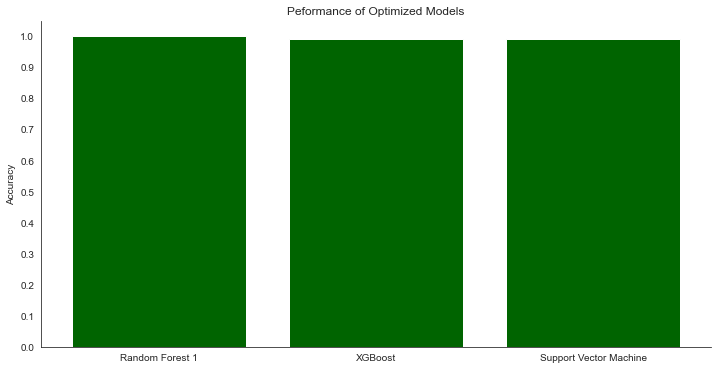

In [ ]:
# Plot accuracies of optimized models
best_scores = {'Random Forest 1': 1,
               
               'XGBoost':.99,
               'Support Vector Machine': .99}

sns.set_style('white')
plt.figure(figsize=(12,6))
plt.bar(best_scores.keys(), best_scores.values(), color='darkgreen')
plt.yticks(ticks=np.linspace(0,1.0,11))
plt.ylabel('Accuracy')
plt.title('Peformance of Optimized Models')
sns.despine()
plt.savefig('accuracies.png', dpi=300, pad_inches=0.5)
plt.show();

random forest has 100% high f1_score

In [ ]:
test_predictions= forest1.predict(pf_test) # prediction for test data
print(test_predictions)

[0 0 0 ... 1 0 1]


# second section for feature selection with another approach ANOVA

Intution of 1 way Anova which is tested using F Distribution is
If there are three attributes a1,a2,a3 and classes C1,C2,C3
if the means of the three class is far from each other than that is a good attribute, feature
so if class means of a1 are (0.5,3.0,5.6) and a2 is (2,2.1,2.2) then a1 is a better feature
This is formally measured by F Score and it is higher from a1 and a2

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=40)
x_train_anova=selector.fit_transform(x_train_scaled, y_train)
x_val_anova=selector.transform(x_val_scaled)
x_test_anova=selector.transform(pf_test_scaled)



In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(x_train_anova,y_train)
y=tree.predict(x_val_anova)
print(classification_report(y,y_val))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1809
           1       0.99      0.99      0.99      1642

    accuracy                           0.99      3451
   macro avg       0.99      0.99      0.99      3451
weighted avg       0.99      0.99      0.99      3451



In [ ]:

# Use GridSearchCV to try various hyperparameter values

import warnings
warnings.filterwarnings('ignore')
params = {'criterion' : ['gini', 'entropy'],
          'max_depth': [2,4,6,8,10,12]}

grid_tree = GridSearchCV(tree, params, cv=3, scoring='accuracy')
grid_tree.fit(x_val_tran, y_val)    

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12]},
             scoring='accuracy')

In [ ]:
grid_tree.best_params_

{'criterion': 'gini', 'max_depth': 10}

In [ ]:
tree=DecisionTreeClassifier(criterion='gini', max_depth= 8)
tree.fit(x_train_anova,y_train)
y=tree.predict(x_val_anova)
print(classification_report(y,y_val))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1801
           1       0.99      0.99      0.99      1650

    accuracy                           0.99      3451
   macro avg       0.99      0.99      0.99      3451
weighted avg       0.99      0.99      0.99      3451



so for the decision tree the f1_score is 99%

# knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
k_range = list(range(1, 30))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid_knn = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_knn.fit(x_train_anova, y_train)


Fitting 10 folds for each of 29 candidates, totalling 290 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             scoring='accuracy', verbose=1)

print(f'best n_neighbors{ grid_knn.best_params_}')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train_anova, y_train)
c=knn.predict(x_val_anova)
print(classification_report(y,y_val))
yt=knn.predict(x_test_anova)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1801
           1       0.99      0.99      0.99      1650

    accuracy                           0.99      3451
   macro avg       0.99      0.99      0.99      3451
weighted avg       0.99      0.99      0.99      3451



 KNeighborsClassifier has f1_score 99%

## so in the end i will use random forest  with parameters {'max_depth': 20, 'max_features': 50, 'n_estimators': 60}



so i will use random forest and get prediction for the test set

In [ ]:
test_predictions= forest1.predict(pf_test) # prediction for test data
print(test_predictions)

[0 0 0 ... 1 0 1]


# explore csv file with prediction values

In [ ]:
prediction = pd.DataFrame(test_predictions, columns=['predictions']).to_csv('prediction.csv')
